# Графики в Python 📈

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

сейчас мы рассмотрим изи примеры классических графиков функций, чтобы +- понять концепт того, что питону нужно, для того, чтобы такую штуку построить

просто задать функцию в переменную и понадеяться, что она каким-то образом построится, не получится. но питон через библиотеку matplotlib красиво строит графики по точкам! для этого нужно подать на вход два массива - точки на оси x и точки на оси y

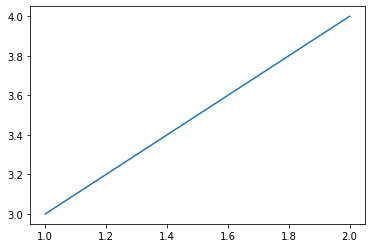

In [10]:
x = np.array ([1, 2]) # точки на оси x
y = np.array ([3, 4]) # точки на оси y

#даем команду "строй"
plt.plot(x, y)

в итоге у нас есть линия, соединяющая 2 точки на 2d пространстве - (1,3) и (2,4)
вот только обычно в школьных задачках нам не даются точки в иксе и игреке, так что нам придется их майнить

школьная матеша говорит нам, что множество всех значений икса - это область определения. чаще всего это какой-то отрезок (от 0 до 100, например) с бесконечным количеством точек. построить балду с бесконечным количеством точек невозможно, поэтому в питоне почти все графики получаются приближенно - возьмем, например, на вышеупомянутом отрезке только 11 точек. в этом нам поможет функция 

```
np.linspace(начало, конец, кол-во точек)
```



In [14]:
x = np.linspace(0, 100, 11)
x

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

допустим, мы хотим нарисовать график y = 2x+5. массив x у нас уже готов, а массив y легко получить по формуле! скажем, что

In [15]:
y = 2*x+5

арифметические операции применились к каждому значению массива x и результат был записан в массив y. теперь, когда все готово, дело за малым - начертить график

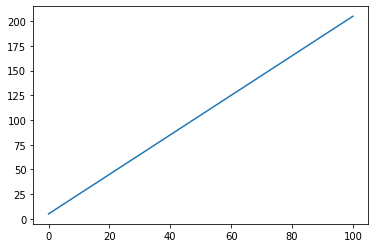

In [16]:
plt.plot(x, y)

когда мы строим графики линейных функций, нам все равно, сколько чисел задавать в x (ну меньше двух ненада), они от количества точнее не станут. разница более заметна, если рисовать что-то более сложное:

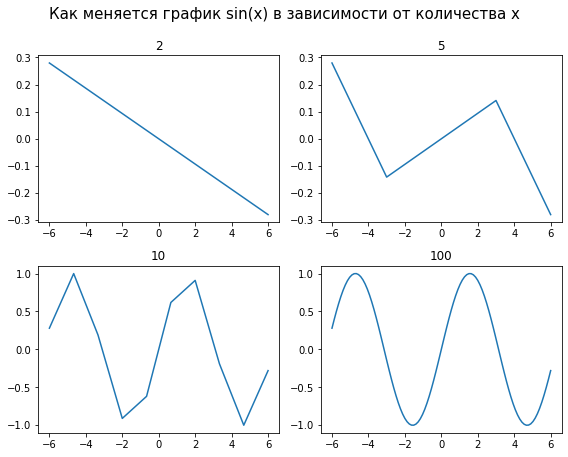

In [40]:
# не вникайте в код, смотрите на картинку!

fig, axes = plt.subplots(2, 2, figsize = (8, 6))
axes = axes.flatten()

for i, x_len in enumerate ([2, 5, 10, 100]):
  x = np.linspace(-6, 6, x_len)
  y = np.sin(x)                             #типа синус хотим нарисовать
  axes[i].set_title(x_len)
  axes[i].plot(x, y)
pass
plt.suptitle('Как меняется график sin(x) в зависимости от количества x', y = 1.05, fontsize = 15)

plt.tight_layout()

**вопрос:** почему так происходит?

**ваш ответ:**

значение x надо файн-тьюнить (подбирать вручную). в идеале это минимальное значение, при котором ваш график не выглядит шакально -- если брать что-то очень большое, matplotlib перенапряжется

### задание:

постройте график функции $y = 2x^{3} + 3x^{2} + 2$ с областью определения (-100, 100). поиграйтесь с количеством точек на оси x

In [50]:
x = # значение x
y = # значение y

# здесь напишите команду, которая вам график нарисует

pass

на матеше у вас бы такой график не приняли -- нет названия, оси не подписаны. но в матплотлиб все продумано, можно добавить легенду, присвоив ее тому графику, который мы рисуем

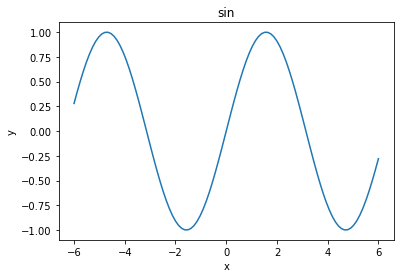

In [63]:
x = np.linspace(-6, 6, x_len)
y = np.sin(x)
plt.plot(x, y)
plt.xlabel('x') # название оси x
plt.ylabel('y') # название оси y
plt.title("sin") # название графика
pass

графики не обязаны выглядеть _настолько_ скучно! их можно кастомизировать: менять стиль, цвет, и толщину линии, менять фон, шрифт... все это описано в документации: https://matplotlib.org/stable/tutorials/introductory/customizing.html#sphx-glr-tutorials-introductory-customizing-py

вообще мы скорее всего не супер активно будем использовать matplotlib -- графики функций нам (почти) ни к чему. мы работаем с табличными данными из пандаса, а там пригодится другой подход -- сиборновский

это не значит, что на матплотлиб надо забить. он, на самом деле, супер удобная база (с цветами, формами, различными дизайнами, возможностью делать сабплоты), на которую надстраиваются другие библиотеки

нам потребуется забрать из матплотлиба несколько вещей:

## реально полезные функции матплотлиба

### 1. название и подписи осей -- пример выше)
### 2. возможность делать подграфики на одном графике *НЕ ОБЯЗАТЕЛЬНО ВДУПЛЯТЬ

предположим, мы хотим на одной картинке отобразить сразу несколько графиков функций - не проблема! просто вызовем plt.plot() несколько раз!

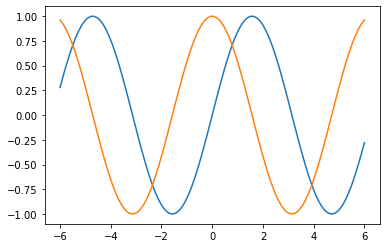

In [73]:
x = np.linspace(-6, 6, x_len)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

но иногда графики разные, имеют разные легенды и разные области определения. рисовать их на одних и тех же осях странно

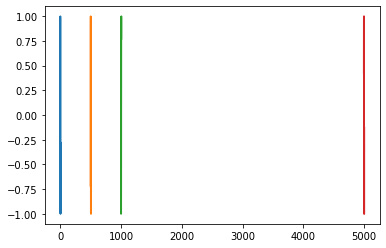

In [75]:
x = np.linspace(-6, 6, x_len)
plt.plot(x, np.sin(x))
plt.plot(x+500, np.cos(x+500))
plt.plot(x+1000, np.cos(x+1000))
plt.plot(x+5000, np.cos(x+5000))

можно, конечно, их по очереди нарисовать, но это отнимает много пространства в ноутбуке. тогда на помощь приходят сабплоты

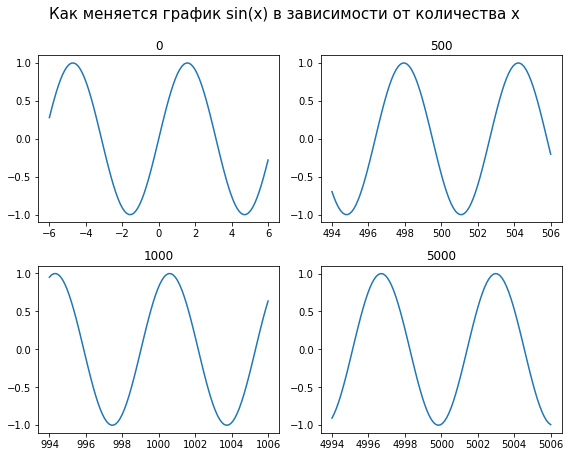

In [77]:
'''
сначала вызовем команду plt.subplots -- она нужна для того, чтобы рисовать каждый график независимо от остальных
у нее есть 3 нужных нам аргумента: 
   - первый: сколько у нас должно быть графиков по вертикали
   - второй: сколько у нас должно быть графиков по горизонтали
   - третий (figsize): какой итоговый размер картинки нам нужен
все это присваивается в 2 переменные - 
   - fig: пустая картинка, канва, для того, чтобы на ней графики рисовать
   - axes: np.array размера (графиков по вертикали, графиков по горизонтали). если возьмем из него определенный индекс (типа axes[0] - 
      получим аналог plt, только маленбкий). сейчас этот массив двумерный - ведь у нас по вертикали и по горизонтали 2 графика.
      по такой штуке итерироваться неудобно. поэтому сделаем его плоским с помощью команды flatten!
'''
fig, axes = plt.subplots(2, 2, figsize = (8, 6))
axes = axes.flatten()

'''
это хитрый цикл: enumerate на каждом шаге дает нам целых 2 итератора - первый это номер цикла, а второй это соответствующее число из списка в скобочках
внутри этого цикла мы рисуем 4 графика, которые мы пытались рисовать в прошлый раз, но уже на разных подграфиках. они все лежат в массиве axes и мы по очереди
обращаемся к ним -- сначала к нулевому элементу и на нем график рисуем, потом к первому и тд
'''
for i, x_diff in enumerate ([0, 500, 1000, 5000]):
  x = np.linspace(-6, 6, 100) + x_diff
  y = np.sin(x)                             #типа синус хотим нарисовать
  axes[i].set_title(x_diff)
  axes[i].plot(x, y)
pass
'''
если у нас на графике есть подграфики, то название всей этой махины задается через команду plt.suptitle
'''
plt.suptitle('Как меняется график sin(x) в зависимости от количества x', y = 1.05, fontsize = 15)

plt.tight_layout() #универсальная команда для расшакаливания расположения графиков. без нее иногда один подграфик залезает на название второго

###3. цвета, которые можно использовать в графиках и палитры
многие библиотеки по рисованию графиков используют матплотлибовские цвета и палитры: полный список цветов можно посмотреть [тут](https://matplotlib.org/stable/gallery/color/named_colors.html)

###4. размер графика
plt.figure(figsize=(15,8))

###5. plt.tight_layout()
если на графике какие-то элементы некрасиво наезжают друг на друга - эта команда может помочь

# seaborn 📊

супер! крутая! и удобная библиотека, с очень красивой [документацией](https://seaborn.pydata.org/)

на самом деле туториал для использования прост: заходите в галерею, ищете понравившийся график, копируете код, меняете столбцы, которые хотите нарисовать и название датафрейма, из которого берете столбцы)

единственная проблема: весь сиборн сделан на базе матплотлиба и по факту является только дополнением. некоторых функций в нем нет, их придется искать и заимствовать в матплотлибе...

давайте возьмем знакомый датасет по титанику и построим по нему пару графиков:

In [65]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv', sep = ';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


## формат команды вызова почти любого сиборновского графика

**sns.**<название графика> **(data =** <датасет который вы используете> **, x =** <что вы хотите отложить по оси x>**, y =** <что вы хотите отложить по оси y>**)**

### sns.lineplot()

это аналог plt.plot(), только чуть более умный!
обычно, когда мы рисуем графики функций, у нас один **y** на один **x** -- иначе это просто не график функции)
но в датафреймах не всегда так, поэтому sns.lineplot рисует график функций, ориентируясь на среднее значение y -- в итоге получается четкая синяя линия. голубой ореол вокруг -- **стандартное отклонение**. типа насколько у нас разные игреки далеки друг от друга. вообще это термин из статистики, о ней мы расскажем чуть позже!

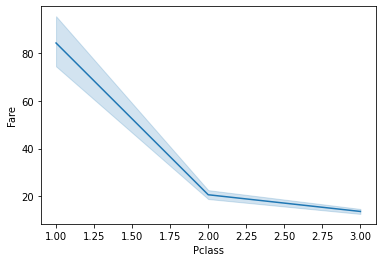

In [84]:
sns.lineplot(data = data, x = 'Pclass', y = 'Fare')

### sns.scatterplot()

среднее значение, это, конечно, здорово, но пусть мы хотим увидеть все значения игрека, которые у нас есть. тогда график функций мы не нарисуем, но можем увидеть все пары (x, y), которые у нас есть

Text(0.5, 1.0, 'Возраст и стоимость поездки всех пассажиров')

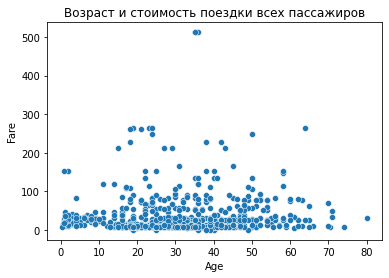

In [88]:
sns.scatterplot(data = data, x = 'Age', y = 'Fare')
plt.title('Возраст и стоимость поездки всех пассажиров') #видите, матплотлиб все-таки нужен!

Text(0.5, 1.0, 'Класс и стоимость поездки всех пассажиров')

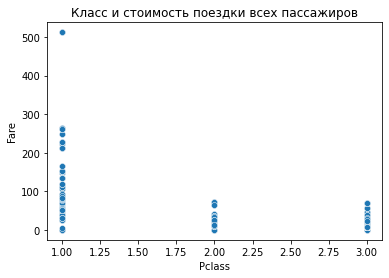

In [90]:
sns.scatterplot(data = data, x = 'Pclass', y = 'Fare')
plt.title('Класс и стоимость поездки всех пассажиров')

### sns.histplot

мы видим, что у нас всего есть 3 класса, куда могли быть определены пассажиры. посмотрим, сколько пассажиров есть в каждом классе

Text(0.5, 1.0, 'Гистограмма классов пассажиров')

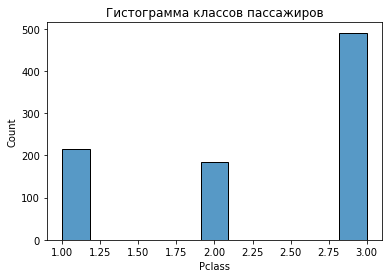

In [91]:
sns.histplot(data = data, x = 'Pclass')
plt.title('Гистограмма классов пассажиров')

пока что мы работали только с числовыми признаками (типа int и float), но гистограмму можно строить и по столбцам, где лежат строки

Text(0.5, 1.0, 'Гистограмма мест высадки пассажиров')

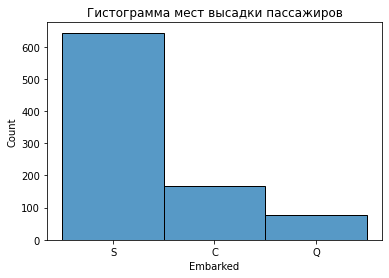

In [93]:
sns.histplot(data = data, x = 'Embarked')
plt.title('Гистограмма мест высадки пассажиров')

### sns.catplot

по столбцам-строчкам обычный scatterplot не строится, для этого нужен график с той же функцией, но другим названием -- catplot

в него можно добавить аргумент kind = <чето>, тогда он будет фантастическими способами менять свою форму. посмотреть на это можно [тут](https://seaborn.pydata.org/tutorial/categorical.html)

Text(0.5, 1.0, 'точки какие-то')

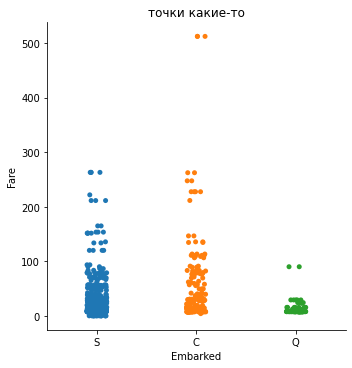

In [95]:
sns.catplot(data = data, x = 'Embarked', y = 'Fare')
plt.title('точки какие-то')

### параметр hue

сиборн дает прикольную возможность почти во всех графиках отражать сразу 3 столбца таблицы, два откладывая на осях, а третий показывая цветом. для этого нужно помимо x и y прописать hue и присвоить ему нужный вам столбец. например, выделим цветом столбец Survived, чтобы было видно, кто выжил, а кто нет

Text(0.5, 1.0, 'Возраст и стоимость поездки всех пассажиров')

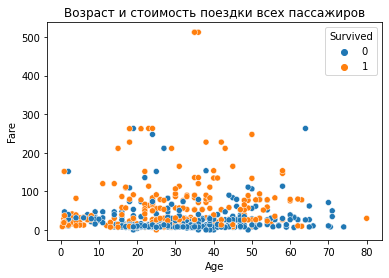

In [96]:
sns.scatterplot(data = data, x = 'Age', y = 'Fare', hue = 'Survived')
plt.title('Возраст и стоимость поездки всех пассажиров') 

просто как заметка на полях: нам не обязательно весь датасет целиком рисовать на графике, можно отрисовать только часть. например, только пассажиры первого класса:

Text(0.5, 1.0, 'Возраст и стоимость поездки всех пассажиров')

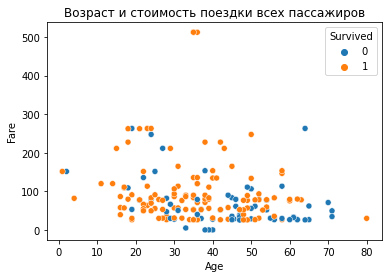

In [97]:
sns.scatterplot(data = data[data.Pclass == 1], x = 'Age', y = 'Fare', hue = 'Survived')
plt.title('Возраст и стоимость поездки всех пассажиров') 

в общем функции пандаса -- в помощь

# домашнее задание 🏠

делать урок по сиборну, показывая _все_ его возможности, очень сложно -- их слишком много. так что в качестве задания предлагаю вам потыкаться в него самостоятельно и нарисовать 3 графика на ваш выбор по одному из трех датасетов:

* **[покемоны](https://www.kaggle.com/abcsds/pokemon?select=Pokemon.csv)**
https://raw.githubusercontent.com/gu1ldenstern/bioinf1514/master/%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/sem6_data_visualization/datasets/Pokemon.csv
* **[пересадки печени в индии](https://www.kaggle.com/uciml/indian-liver-patient-records)**
https://raw.githubusercontent.com/gu1ldenstern/bioinf1514/master/%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/sem6_data_visualization/datasets/indian_liver_patient.csv
* **[топ 50 треков на спотифае за 2020](https://www.kaggle.com/atillacolak/top-50-spotify-tracks-2020)**
https://raw.githubusercontent.com/gu1ldenstern/bioinf1514/master/%D1%81%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/sem6_data_visualization/datasets/spotifytoptracks.csv

🎺🎺 **ткните на название датасета, чтобы посмотреть описание столбцов, ссылку надо скопировать в pd.read_csv()** 🎺🎺


## конкурс 😯
сегодня не было проверочной работы, поэтому бонусные баллы получат 5 человек с самыми красивыми, сложными и разумными (по отношению к датасету) графиками. 

*сложный = с подграфиками, с продуманной легендой и цветами, с фишками сиборна и матплотлиба, которые не покрываются семинаром, с использованием фильтров pandas для предобработки*

я могу спросить значение тех или иных строк, нет ответа-нет бонуса, поэтому не копируйте из источников бессмысленно!

**в помощь:**

[документация матплотлиба](https://matplotlib.org/stable/tutorials/index)

[документация сиборна](https://seaborn.pydata.org/examples/index.html)

[гугл](https://www.google.com/)